In [5]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
with open('/opt/ml/input/data/upstage_dataset_resize/ufo/train.json', 'r') as f:
    anno = json.load(f)

# img_name = '20210913_005011.jpg'

img_names = anno['images'].keys()

for img_name in tqdm(img_names):
    # print(img_name)
    ann = anno['images'][img_name]

    # img = cv2.imread('/opt/ml/input/data/dataset_resize/images/'+img_name)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # print(img.shape)

    # plt.imshow(img)
    # plt.show()

    # pts = ann['words']['37']['points']
    for word in ann['words'].values():
        pts = word['points']
        if len(pts) > 4:
            pts = np.array(pts, dtype=np.int32)
            # cv2.polylines(img, [pts], True, (128, 255, 0), 5)
            area_0 = cv2.contourArea(pts)
            mar = cv2.minAreaRect(np.array(pts))
            box = cv2.boxPoints(mar)
            area_1 = cv2.contourArea(box)
            area_ratio = area_0/area_1
            if area_ratio < .55:
                word['illegibility'] = True
                # print(area_ratio)
            word['points'] = box.tolist()
            # cv2.polylines(img, [box.astype(np.int32)], True, (128, 255, 255), 5)

    # plt.figure(figsize=(15, 15))
    # plt.imshow(img)
    # plt.show()

100%|██████████| 1288/1288 [00:00<00:00, 8141.95it/s]

0F885DC0-3E65-4081-9DBB-CA96BB6FD4FC.JPG
0N8A5655.jpg
0N8A5660.jpg
1566707302390-24.jpg
1595697184898-0.jpg
1604828077798-0.jpg
1607660335218-2.jpg
1607662862521-14.jpg
1610698978661-5.jpg
1611555922111.jpg
1613386234855-5.jpg
1614589824671.jpg
1616649356480-20.jpg
1617005973283-7.jpg
1627442579671.jpg
1628359968950-1.jpg
1631619209578-1.jpg
1631619209578-10.jpg
1631619209578-11.jpg
1631619209578-2.jpg
1631619209578-3.jpg
1632025681410-0.jpg
1632025681410-1.jpg
1632025740022-4.jpg
1632025745030.jpg
1632025852854.jpg
1632025861563.jpg
1632026033867.jpg
1632026039618.jpg
1632026049420.jpg
1632280638944-0.jpg
1632280638944-2.jpg
1632280638944-5.jpg
1632640391949-10.jpg
1632640391949-4.jpg
1632640391949-5.jpg
1632642120705-1.jpg
1632643837411-1.jpg
1632643837411-10.jpg
1632643837411-15.jpg
1632643837411-16.jpg
1632643837411-17.jpg
1632643837411-19.jpg
1632643837411-2.jpg
1632643837411-22.jpg
1632643837411-23.jpg
1632643837411-3.jpg
1632643837411-5.jpg
1632643837411-7.jpg
1632643837411-8.jp

In [10]:
remove_keys = [
    '1607662862521-14.jpg',
    '1632640391949-4.jpg',
    '1632646840914-3.jpg',
    '1632648324272-1.jpg',
    '1632650015287-8.jpg',
    '1632655330045-20.jpg',
    '20191222_173310.jpg',
    '20191222_225910.jpg',
    '20200128_153714.jpg',
    '20200729_174803.jpg',
    '20200806_205918.jpg',
    '20200823_212502.jpg',
    '20200825_205146.jpg',
    '20200829_012546.jpg',
    '20200830_143751.jpg',
    '20201029_020252.jpg',
    '20201109_183524.jpg',
    '20201208_185303.jpg',
    '20210909_235358.jpg',
    '20210910_125055.jpg',
    '20210911_124105.jpg',
    '20210913_222612.jpeg',
    '20210914_222525.jpg',
    '20210916_202324.jpeg',
    '20210916_204603.jpeg',
    '20210916_204605.jpeg',
    '20210916_204628.jpeg',
    '20210918_105750.jpg',
    '20210915_193912.jpeg',
    '20210918_224842.jpg',
    '20210918_225248.jpg',
    '20210919_131146.jpg',
    '20210919_164549.jpg',
    '20210919_165118.jpg',
    '20210920_112933.jpg',
    '20210925_135221.jpg',
    '20210925_135858.jpg',
    '20210926_104458.jpg',
    '20210926_104838.jpg',
]

for k in remove_keys:
    anno['images'].pop(k)

In [11]:
with open('/opt/ml/input/data/upstage_dataset_resize/ufo/train_rect.json', 'w') as f:
    json.dump(anno, f)

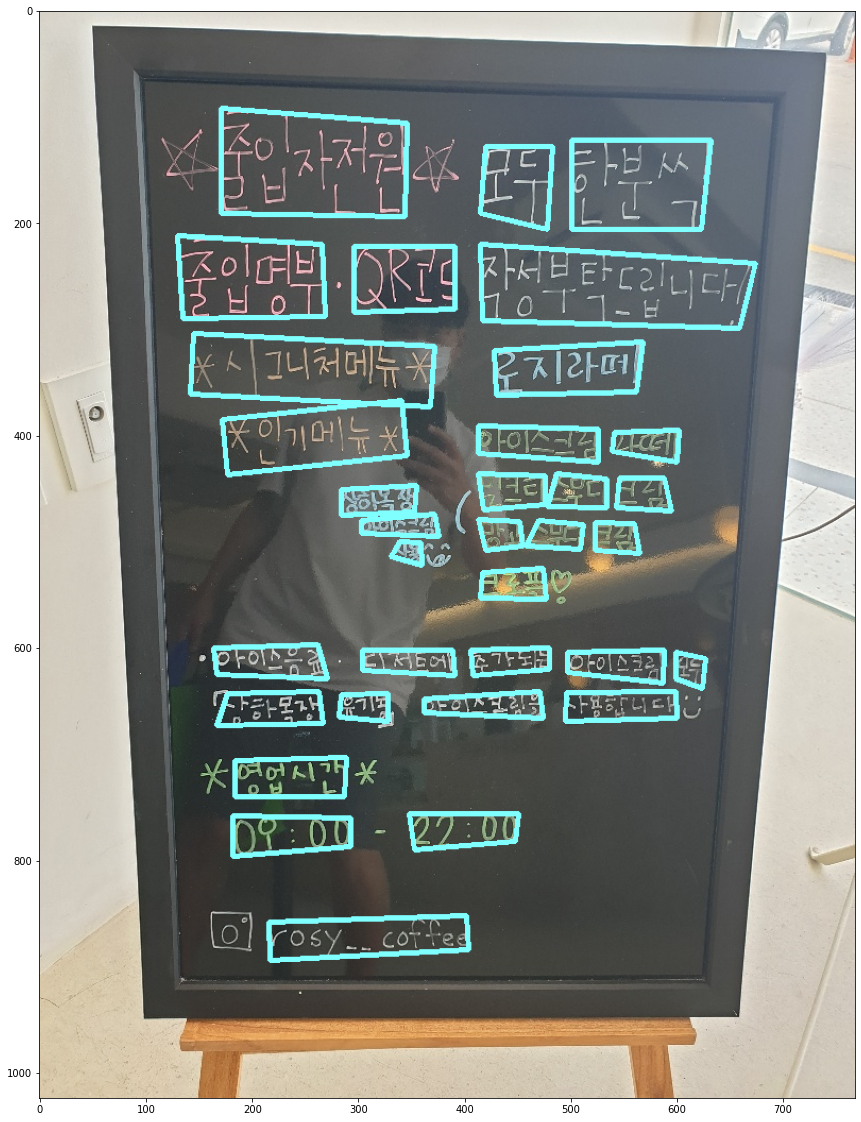

In [12]:
img_name = '20210910_141932.jpg'
ann = anno['images'][img_name]
img = cv2.imread('/opt/ml/input/data/upstage_dataset_resize/images/'+img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for word in ann['words'].values():
    pts = np.array(word['points'], dtype=np.int32)
    cv2.polylines(img, [pts], True, (128, 255, 255) if not word['illegibility'] else (255, 0, 128), 3)
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()